### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 18-Feb-25     

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [228]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-02-23 19:44:40


In [229]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [230]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('punkt_tab')

# vectorization: BOW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorization: LSA
from sklearn.decomposition import TruncatedSVD

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [231]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [232]:
df = pd.read_csv("dataset/news_Feb_14.csv")
df = df.iloc[:, 0]  # Select only the headline column
documents = df.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [233]:
original_headlines = documents.copy()  # Keep original headlines before preprocessing

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase to have accurate DTM/TDM

In [234]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-02-23 19:44:40


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [235]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [236]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. but we initialize stop words in count vectorizer. we have two other options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. However this is not a good practice. 
- pulling stop words from ```ntlk``` library:
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
however after running this code it didnt not remove stop words thus i removed it

In [237]:
stop_word = False
stop_word_language = 'english'

stop_word

False

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

### Stemming
this reduces words to their singular form however it is not said to be very good. we cannot say this surely as we have not rigourously tested it yet. 

In [238]:
stemmer = PorterStemmer()
documents = [" ".join([stemmer.stem(word) for word in doc.split()]) for doc in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-02-23 19:44:41


['ecc endors purchas of 582 mn capit share in bricss new develop bank',
 'netanyahu statement to establish palestinian state in saudi arabia irresponsible, provoc fo',
 'india, us agre to resolv trade and tariff row after trump modi talk',
 'aurangzeb discuss pakistan structur reform with ifc chief',
 'hbl, sp global launch pakistan first manufactur pmi',
 'kse 100 close 479 point lower as late session sell eras intra day gain',
 'ppl execut agreement for sui ga field oper',
 'hubco green, pso collabor to setup ev charg infrastructur across pakistan',
 'rupe record margin improv against us dollar',
 'at least 9 dead, 7 injur in balochistan harnai blast',
 'gold add to record rally, reach rs 306,200 per tola in pakistan',
 'imf 2024 articl iv report, and debat on inflationi',
 'pakistan cpi 2024 deep root corrupt persist',
 'like a wormhol musk promis dubai loop tunnel network',
 'reform pension fund in pakistan a sustain approach',
 'cjp afridi administ oath to newli appoint sc judg',


### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. but again we cannot say this surely as we have not tested it yet. 

In [239]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [240]:
# documents = [lemmatize_doc(doc) for doc in documents]
# documents

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

In [241]:
# n_gram_range = (1, 1) # unigram
n_gram_range = (2, 2) # bigram

n_gram_range

(2, 2)

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- CountVectorizer using term-presence
- CountVextorizer using term-frequency
- TfidfVectorizer using term-frequency-inverse-document-frequency
- LSA using different 'n'

in this code we are exploring the last method LSA (TruncatedSVD)

## TF-IDF
here we construct a DTM (document to term matrix) using term-frequency inverse-data-frequency applied first before applying LSA

In [242]:
if stop_word is True:
    vectorizer = TfidfVectorizer(stop_words=stop_word_language, ngram_range=n_gram_range)
    documents = vectorizer.fit_transform(documents)
    print('Stop words removed')
else:
    vectorizer = TfidfVectorizer(ngram_range=n_gram_range)
    documents = vectorizer.fit_transform(documents)
    print('All words kept')

print("Finished executing at:", get_current_datetime())
documents.toarray()[:5]

All words kept
Finished executing at: 2025-02-23 19:44:41


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [243]:
# Get feature names (words) from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
df = pd.DataFrame(documents.toarray(), columns=feature_names)

df

,000 school,092 honda,10 bn,10 dead,10 movi,10 prize,10 th,10 turkey,10 year,100 close,...,zealand in,zealand provid,zelenski say,zelenskiy must,zelenskiy say,zeta jone,zia ijaz,zia mohyeddin,zone and,zoo will
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301511,0.0,0.0,0.0
449,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
450,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
451,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [244]:
# Find (column, row) indices where frequency != 0
indices = np.argwhere(df.values != 0)

# Convert indices to a list of (word, row) pairs
word_occurrences = [(df.columns[col], row) for row, col in indices]

# Display the result
print(word_occurrences[:5])

[('582 mn', 0), ('bricss new', 0), ('capit share', 0), ('develop bank', 0), ('ecc endors', 0)]


## LSA
now we apply LSA, with different values of n (50, 100, 200). it is a way of reducing the matrix to lesser terms by making it more denser as our current matrix is more than 2000+ columns (regardless of stop words and ngrams)

In [245]:
n = 200
n

200

In [246]:
svd_model = TruncatedSVD(n_components=n, algorithm='randomized', n_iter=100, random_state=erp)
documents = svd_model.fit_transform(documents)
documents

array([[ 3.26587232e-17, -2.15369917e-17, -6.09447157e-17, ...,
        -3.04974522e-02,  2.32971813e-02, -3.29213052e-02],
       [ 1.69111607e-05,  3.08441650e-04, -5.52544054e-16, ...,
        -4.86323927e-05, -8.75553420e-05,  1.75975935e-05],
       [ 9.88958880e-01, -5.83284485e-05,  3.23837945e-16, ...,
         5.41575554e-06, -5.22717529e-08, -3.47533845e-05],
       ...,
       [ 9.38310708e-03, -5.61374141e-07, -1.30637792e-16, ...,
        -3.19509983e-06, -8.09019015e-07,  2.85507281e-05],
       [-1.02661894e-17,  6.57762968e-18, -7.56403634e-17, ...,
         1.87525623e-04, -8.35349975e-04, -5.80146479e-04],
       [-3.60632294e-17, -4.68328750e-17,  2.69392267e-17, ...,
        -4.48058258e-02,  4.95536829e-02,  8.69342287e-02]])

In [247]:
# Get feature names (words) from CountVectorizer
feature_names_lsa = svd_model.get_feature_names_out()

# Convert sparse matrix to DataFrame
df_lsa = pd.DataFrame(documents, columns=feature_names_lsa)

df_lsa

,truncatedsvd0,truncatedsvd1,truncatedsvd2,truncatedsvd3,truncatedsvd4,truncatedsvd5,truncatedsvd6,truncatedsvd7,truncatedsvd8,truncatedsvd9,...,truncatedsvd190,truncatedsvd191,truncatedsvd192,truncatedsvd193,truncatedsvd194,truncatedsvd195,truncatedsvd196,truncatedsvd197,truncatedsvd198,truncatedsvd199
0,3.265872e-17,-2.153699e-17,-6.094472e-17,1.079331e-16,-4.647979e-17,-4.632679e-17,7.899544e-18,4.711865e-18,-4.054586e-17,-4.442392e-18,...,-5.487440e-02,-1.756215e-02,-7.586684e-03,1.950642e-02,-5.148819e-02,4.443519e-02,3.873685e-02,-3.049745e-02,2.329718e-02,-3.292131e-02
1,1.691116e-05,3.084416e-04,-5.525441e-16,1.155204e-15,-2.179557e-16,1.262844e-09,6.205121e-08,8.160074e-05,-3.113399e-16,5.346259e-18,...,2.480043e-05,5.023249e-06,8.467788e-05,-1.333347e-04,-6.280308e-05,-2.314518e-04,-3.696860e-05,-4.863239e-05,-8.755534e-05,1.759759e-05
2,9.889589e-01,-5.832845e-05,3.238379e-16,-3.924226e-15,-8.304697e-15,-2.791904e-07,-5.685460e-07,-6.656822e-04,3.470028e-17,-4.691573e-18,...,2.959999e-07,-3.132367e-06,-8.137087e-07,1.816677e-06,1.449137e-06,-7.003743e-06,-5.835143e-05,5.415756e-06,-5.227175e-08,-3.475338e-05
3,-2.587536e-17,1.728908e-18,4.759681e-17,-1.190420e-16,3.603703e-17,-1.307042e-17,8.861866e-18,1.611088e-17,6.148769e-20,3.779154e-18,...,8.149247e-02,1.648748e-02,-1.014662e-01,-4.025308e-02,-1.279185e-01,2.279813e-02,3.174480e-03,1.607628e-01,7.577066e-02,-1.300939e-01
4,5.822096e-18,-3.440862e-17,-1.322999e-16,-7.632419e-17,2.541211e-17,1.577437e-16,-2.879151e-17,9.596518e-18,1.198302e-17,1.244774e-16,...,-9.900680e-14,-6.061289e-15,7.227992e-15,5.181379e-14,-2.715094e-15,1.808407e-14,-4.347194e-14,-1.866489e-14,-2.148837e-14,-3.184617e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-2.821372e-17,-2.542308e-17,-1.512745e-17,-1.191677e-16,-1.393334e-18,2.192167e-17,1.616080e-17,1.965777e-17,2.167620e-17,4.171931e-18,...,4.451339e-02,1.522087e-02,-7.043875e-02,-2.846119e-03,-1.041901e-02,8.207638e-02,6.026197e-02,1.421838e-01,-1.042664e-01,-9.865498e-04
449,2.828749e-06,5.171949e-05,7.840779e-18,-3.468576e-17,-2.403288e-17,2.143955e-10,1.078652e-08,1.416797e-05,-2.989376e-18,-1.999217e-17,...,4.998913e-03,-1.143942e-02,3.507406e-02,1.505732e-02,-9.655441e-03,6.555242e-02,8.170188e-02,-7.707135e-03,-9.972267e-03,5.585158e-02
450,9.383107e-03,-5.613741e-07,-1.306378e-16,-1.031033e-16,-6.500238e-17,-2.909449e-09,-8.664009e-09,-1.041618e-05,-4.853688e-17,-1.833925e-17,...,-1.313627e-07,4.326122e-06,-3.089222e-07,-1.097434e-06,-2.761857e-06,7.096392e-06,5.819292e-05,-3.195100e-06,-8.090190e-07,2.855073e-05
451,-1.026619e-17,6.577630e-18,-7.564036e-17,-9.026689e-17,3.884502e-17,2.451559e-17,3.115806e-17,8.280866e-18,1.463855e-03,1.324554e-17,...,1.286744e-04,7.214221e-05,-1.208603e-04,-1.348898e-04,-1.807249e-05,-1.525303e-05,-5.086129e-05,1.875256e-04,-8.353500e-04,-5.801465e-04


# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [248]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [249]:
def run_k_means(k, data):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    values = [[silhouette_avg, wss]]
    # Create DataFrame and copy to clipboard
    df = pd.DataFrame(values)
    df.to_clipboard(index=False, header=False)
    print("copied to clipboard")
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")

Executing 5 start time: 2025-02-23 19:45:02
K=5: Silhouette Score and WSS=-0.0037	225.0007
copied to clipboard

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- DeepSeek dilemma: Why is the Chinese AI app facing global backlash?
- CJP Afridi administers oath to newly-appointed SC judges
- No prison for Imran’s sisters; Swati ‘found involved’ in May 9 cases
- Paramount and youtube clash over contract, channels may be dropped
- Senate panel advances nomination of Kash Patel as FBI director pick

Cluster 2:
- PlayStation state of play returns with new games, trailers, and updates
- Hubco expands into EV charging sector with new subsidiary, partners with PSO
- Google partners with Poland to expand AI adoption in key sectors
- Supreme Court updates seniority list with new judges
- Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan

Cluster 3:
- PM Shehbaz i

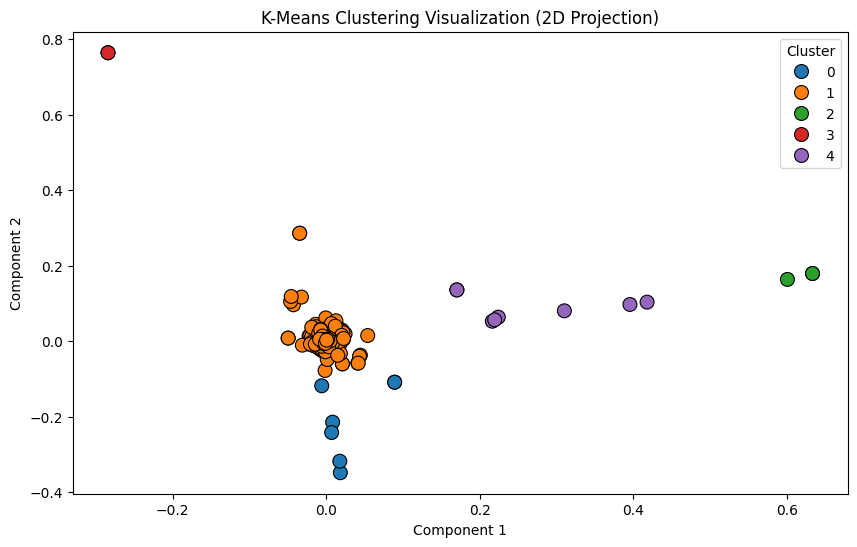

Finished displaying at: 2025-02-23 19:45:03 

Finished executing at: 2025-02-23 19:45:03 



In [250]:
run_k_means(5, documents)

Executing 9 start time: 2025-02-23 19:45:03
K=9: Silhouette Score and WSS=-0.0362	221.2996
copied to clipboard

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- If love hurts, the Sufis say you’re doing it right

Cluster 2:
- Bano Butt: The Trailblazer changing the face of Women’s MMA in Pakistan
- I want to become a UFC World Champion, Bano Butt on her dreams and breaking barriers

Cluster 3:
- Israel says Hamas must free three living hostages
- Aurangzeb highlights increasing risks facing insurance industry
- Page Analyses and Comments LHR Page 2
- Police charge couple with murder of child maid
- Mariyam Nafees’ husband’s past marriage surprises fan

Cluster 4:
- KP govt prepares to launch first air ambulance service
- K-P prepares to launch first air ambulance, test flight completed

Cluster 5:
- Watch: Humpback whale swallows kayaker in dramatic Chilean waters encounter
- Coupl

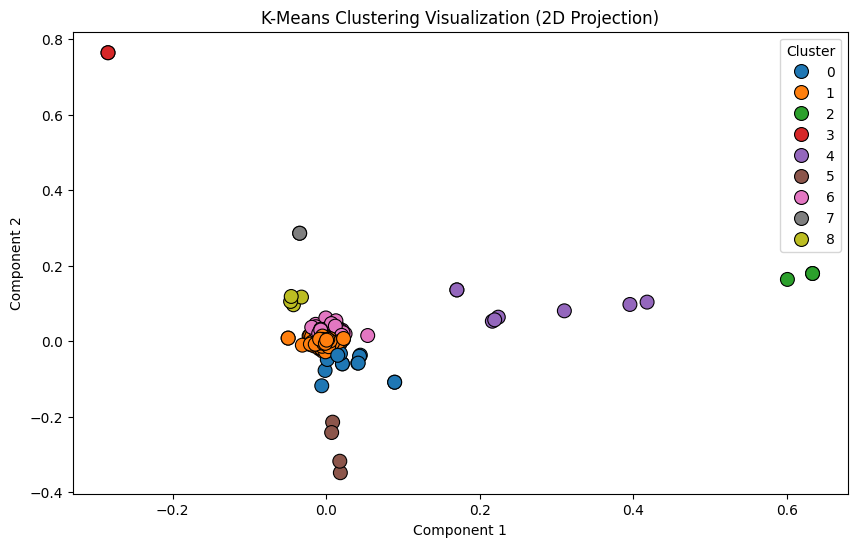

Finished displaying at: 2025-02-23 19:45:04 

Finished executing at: 2025-02-23 19:45:04 



In [251]:
run_k_means(9, documents)

Executing 13 start time: 2025-02-23 19:45:04
K=13: Silhouette Score and WSS=-0.0229	215.9237
copied to clipboard

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- If love hurts, the Sufis say you’re doing it right

Cluster 2:
- Bano Butt: The Trailblazer changing the face of Women’s MMA in Pakistan
- I want to become a UFC World Champion, Bano Butt on her dreams and breaking barriers

Cluster 3:
- Israel says Hamas must free three living hostages
- Aurangzeb highlights increasing risks facing insurance industry
- Page Analyses and Comments LHR Page 2
- Police charge couple with murder of child maid
- Mariyam Nafees’ husband’s past marriage surprises fan

Cluster 4:
- KP govt prepares to launch first air ambulance service
- K-P prepares to launch first air ambulance, test flight completed

Cluster 5:
- Watch: Humpback whale swallows kayaker in dramatic Chilean waters encounter
- Cou

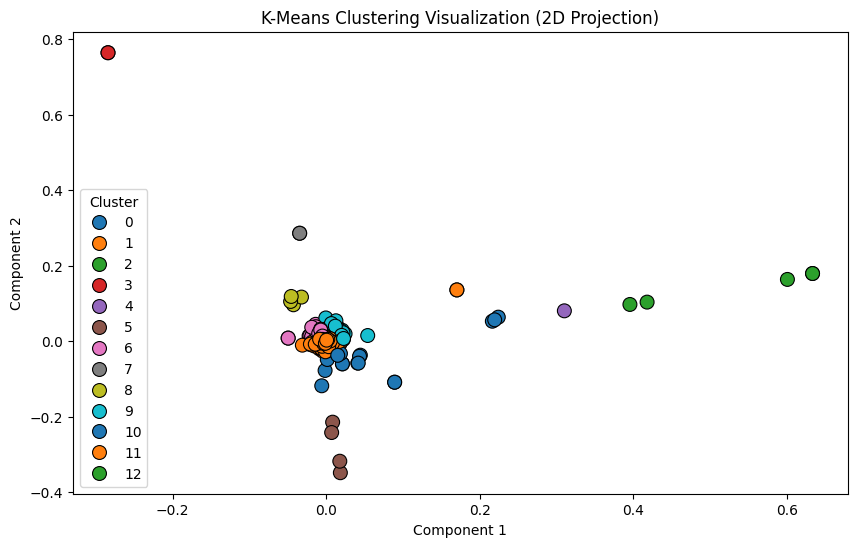

Finished displaying at: 2025-02-23 19:45:04 

Finished executing at: 2025-02-23 19:45:04 



In [252]:
run_k_means(13, documents)